In [3]:
import math
import numpy as np
import pandas as pd
import boto3
from fastai.vision import *
from fastai.metrics import error_rate

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install scikit-plot

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
ls "/content/drive/My Drive/face-emotion-recognition-dataset.zip"

'/content/drive/My Drive/face-emotion-recognition-dataset.zip'


In [6]:
!unzip "/content/drive/My Drive/face-emotion-recognition-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/face-emotion-recognition-dataset/images/validation/surprise/._31961.jpg  
  inflating: face-emotion-recognition-dataset/images/validation/surprise/29690.jpg  
  inflating: __MACOSX/face-emotion-recognition-dataset/images/validation/surprise/._29690.jpg  
  inflating: face-emotion-recognition-dataset/images/validation/surprise/22921.jpg  
  inflating: __MACOSX/face-emotion-recognition-dataset/images/validation/surprise/._22921.jpg  
  inflating: face-emotion-recognition-dataset/images/validation/surprise/22666.jpg  
  inflating: __MACOSX/face-emotion-recognition-dataset/images/validation/surprise/._22666.jpg  
  inflating: face-emotion-recognition-dataset/images/validation/surprise/34004.jpg  
  inflating: __MACOSX/face-emotion-recognition-dataset/images/validation/surprise/._34004.jpg  
  inflating: face-emotion-recognition-dataset/images/validation/surprise/6877.jpg  
  inflating: __MACOSX/face-emotion-recognitio

In [7]:
np.random.seed(42)
dataset = '/content/face-emotion-recognition-dataset/images'
data = ImageDataBunch.from_folder(dataset, train="train", valid="validation",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.valid_ds

LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neutral,neutral,neutral,neutral,neutral
Path: /content/face-emotion-recognition-dataset/images

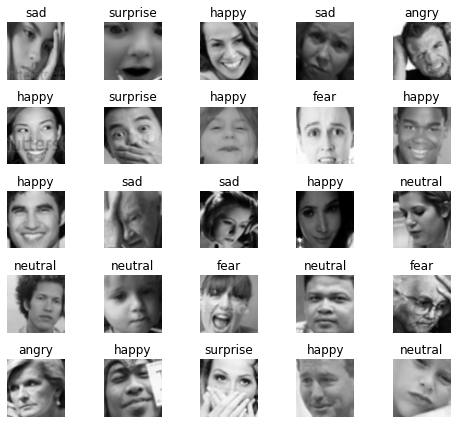

In [9]:
data.show_batch(rows=5, figsize=(7,6))


In [10]:
print(data.classes)
len(data.classes),data.c

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


(7, 7)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.705778,1.483216,0.568072,04:33
1,1.444113,1.292678,0.497311,04:35
2,1.298797,1.192211,0.456977,04:36
3,1.230418,1.161413,0.442117,04:37


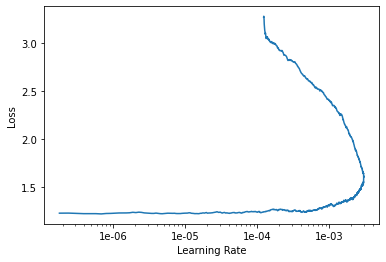

In [13]:
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(8, max_lr=slice(1e-4,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,1.233780,1.153943,0.439145,04:33
1,1.191718,1.126532,0.426833,04:34
2,1.178685,1.101674,0.416077,04:35
3,1.161935,1.078609,0.408152,04:34
4,1.125542,1.066159,0.401783,04:34
5,1.138415,1.055713,0.395839,04:35
6,1.082279,1.050888,0.395132,04:35
7,1.118610,1.051135,0.395839,04:36


In [15]:
interp = ClassificationInterpretation.from_learner(learn)


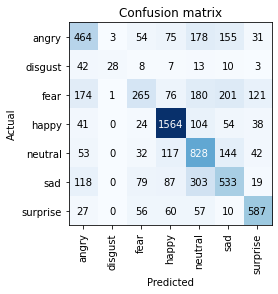

In [16]:
interp.plot_confusion_matrix()


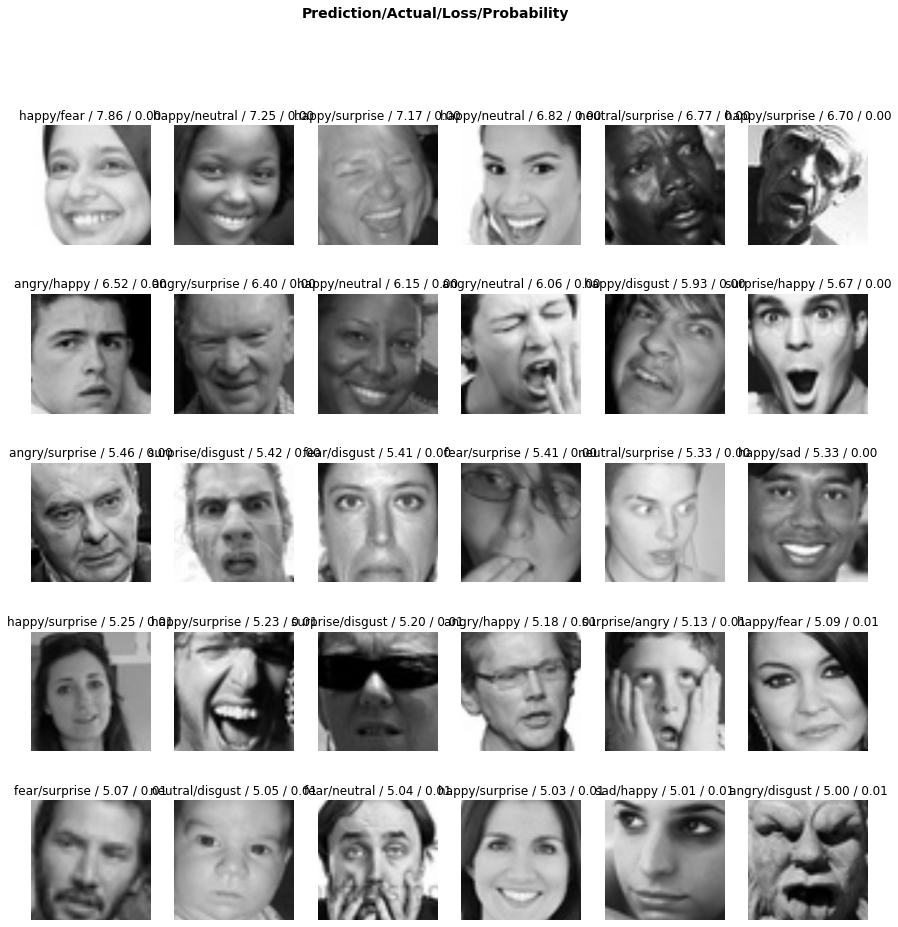

In [19]:
interp.plot_top_losses(30, figsize=(15,15))
